In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

Using TensorFlow backend.


In [2]:
print(tf.__version__)

2.1.0


In [3]:
# load the train and test datasets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [4]:
# Reshape the Y datasets
Y_train = Y_train.reshape(X_train.shape[0], 1)
Y_test = Y_test.reshape(X_test.shape[0], 1)

# Explore the dataset
print("X_train shape:" + str(X_train.shape))
print("Y_train shape:" + str(Y_train.shape))
print("X_test shape:" + str(X_test.shape))
print("Y_test shape:" + str(Y_test.shape))

X_train shape:(60000, 28, 28)
Y_train shape:(60000, 1)
X_test shape:(10000, 28, 28)
Y_test shape:(10000, 1)


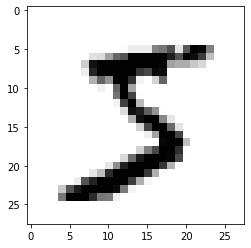

In [5]:
# see any image of the dataset
i = 0
img = X_train[i, :]
img = img.reshape(28, 28)
plt.imshow(255-img, cmap='gray')

In [6]:
# Standardize data to have feature values between 0 and 1.
X_train = X_train/255.
X_test = X_test/255.

### Build the model with Tensor Flow 2.0

In [7]:
from keras.models import Sequential
from keras.layers import Flatten, Dense

In [8]:
# define the model
model = Sequential()
model.add(Flatten(input_shape = (28, 28)))
model.add(Dense(35, activation = 'relu'))
model.add(Dense(20, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

In [9]:
# summary of the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 35)                27475     
_________________________________________________________________
dense_2 (Dense)              (None, 20)                720       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                210       
Total params: 28,405
Trainable params: 28,405
Non-trainable params: 0
_________________________________________________________________


In [10]:
# compile the model
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [11]:
# iterate on training data with mini batch size of 512 
history = model.fit(X_train, Y_train, epochs = 25, batch_size = 512, validation_split = 0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/25
48000/48000 [==============================] - 2s 39us/step - loss: 1.1733 - accuracy: 0.6563 - val_loss: 0.4673 - val_accuracy: 0.8788
Epoch 2/25
48000/48000 [==============================] - 1s 15us/step - loss: 0.3867 - accuracy: 0.8953 - val_loss: 0.3002 - val_accuracy: 0.9167
Epoch 3/25
48000/48000 [==============================] - 1s 14us/step - loss: 0.2900 - accuracy: 0.9179 - val_loss: 0.2525 - val_accuracy: 0.9298
Epoch 4/25
48000/48000 [==============================] - 1s 13us/step - loss: 0.2455 - accuracy: 0.9307 - val_loss: 0.2271 - val_accuracy: 0.9352
Epoch 5/25
48000/48000 [==============================] - 1s 14us/step - loss: 0.2172 - accuracy: 0.9377 - val_loss: 0.2073 - val_accuracy: 0.9407
Epoch 6/25
48000/48000 [==============================] - 1s 14us/step - loss: 0.1951 - accuracy: 0.9441 - val_loss: 0.1953 - val_accuracy: 0.9433
Epoch 7/25
48000/48000 [==============================] - 1s 13us/st

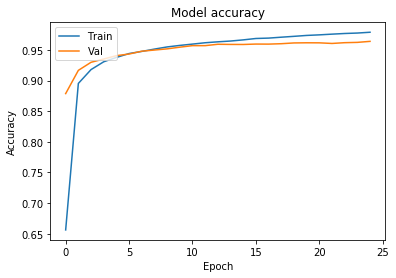

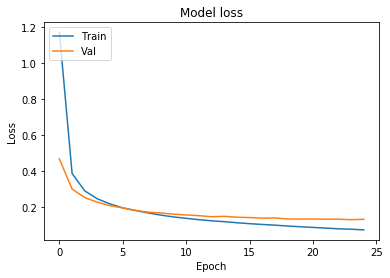

In [12]:
# plot training and validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Val'], loc = 'upper left')
plt.show()

# plot training and validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Val'], loc = 'upper left')
plt.show()

In [13]:
# find the accuracy on train and test set
train_loss, train_acc = model.evaluate(X_train, Y_train)
test_loss, test_acc = model.evaluate(X_test, Y_test)
print("Accuracy on train set is %f" %(train_acc * 100)  + "%")
print("Accuracy on test set is %f" %(test_acc * 100)  + "%")

10000/10000 [==============================] - 0s 39us/step
Accuracy on train set is 97.675002%
Accuracy on test set is 96.340001%


In [14]:
# get the predicted classes from the model
Y_pred = model.predict_classes(X_test)

The model predicted it as: 7


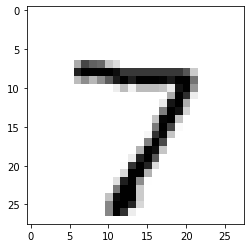

In [15]:
# check the predictions
i = 0
img = X_test[i, :]
img = img.reshape(28, 28)
plt.imshow(255-img, cmap='gray')

print("The model predicted it as: %i" %Y_pred[i])